In [305]:
import pandas as pd
data=pd.read_csv('Table1.csv')
data['age']=2019-data['Year_of_publication']+1
data['citation_per_year']=data['Number_of_citations']/data['age']
data.head(3)

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,Number_of_citations,Indexing_algorithm,global_alignment_algorithm,wrapper,wrapper_of the original tool,...,fix length seed,hybrid seeding (search for keyword variable),spaced seed (search for spaced or gapped),chain_of_seeds,Technology,email - first author,email - last author,Verified,age,citation_per_year
0,1.0,2001,SSAHA,https://www.sanger.ac.uk/science/tools/ssaha,SSAHA: a fast search method for large DNA data...,1093.0,hashing,seed,N,NaN,...,Y,N,N,N,DNA,zn1@sanger.ac.uk,mullikin@mail.nih.gov,base-by-base alignment,19,57.526316
1,2.0,2002,Blat,https://genome.ucsc.edu/cgi-bin/hgBlat,BLAT—the BLAST-like alignment tool,6935.0,hashing,seed,N,NaN,...,Y,N,N,Y,DNA,kent@soe.ucsc.edu,------,"No hamming distance, it keeps increasing the s...",18,385.277778
2,3.0,2003,BLASTZ,https://www.bx.psu.edu/miller_lab/,Human–Mouse Alignments with BLASTZ,1339.0,hashing,seed,Y,A wrapper of PipMaker—A Web Server for Alignin...,...,Y,N,N,N,DNA,webb@bio.cse.psu.edu,wcm2@psu.edu,They change the alignment scoring of BlastZ in...,17,78.764706


In [306]:
def f(x):
    if x['local'] == 'SW': return 'Smith–Waterman (SW)' 
    elif x['local'] == 'hamming distance': return 'hamming distance'
    elif x['local'] == 'NW': return 'Needleman–Wunsch (NW)'
    elif x['local'] == 'Non-DP heuristic': return 'non-DP heuristic'
    elif x['local'] == 'SW & NW': return 'SW & NW'
    elif x['local'] == 'banded Myres bit vector': return 'banded Myres bit vector'
    elif x['local'] == 'Semi-global': return 'semi-global'
    elif x['local'] == 'Local': return 'Smith–Waterman (SW)'
    else: return 'other'

data['local2'] = data.apply(f, axis=1)
data.head()

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,Number_of_citations,Indexing_algorithm,global_alignment_algorithm,wrapper,wrapper_of the original tool,...,hybrid seeding (search for keyword variable),spaced seed (search for spaced or gapped),chain_of_seeds,Technology,email - first author,email - last author,Verified,age,citation_per_year,local2
0,1.0,2001,SSAHA,https://www.sanger.ac.uk/science/tools/ssaha,SSAHA: a fast search method for large DNA data...,1093.0,hashing,seed,N,NaN,...,N,N,N,DNA,zn1@sanger.ac.uk,mullikin@mail.nih.gov,base-by-base alignment,19,57.526316,hamming distance
1,2.0,2002,Blat,https://genome.ucsc.edu/cgi-bin/hgBlat,BLAT—the BLAST-like alignment tool,6935.0,hashing,seed,N,NaN,...,N,N,Y,DNA,kent@soe.ucsc.edu,------,"No hamming distance, it keeps increasing the s...",18,385.277778,non-DP heuristic
2,3.0,2003,BLASTZ,https://www.bx.psu.edu/miller_lab/,Human–Mouse Alignments with BLASTZ,1339.0,hashing,seed,Y,A wrapper of PipMaker—A Web Server for Alignin...,...,N,N,N,DNA,webb@bio.cse.psu.edu,wcm2@psu.edu,They change the alignment scoring of BlastZ in...,17,78.764706,Smith–Waterman (SW)
3,4.0,2005,C4,NaN,Automated generation of heuristics for biologi...,1138.0,hashing,seed,N,NaN,...,N,N,N,DNA,ensembl-helpdesk@ebi.ac.uk,birney@ebi.ac.uk,"If you check Fig 2, this only performs alignme...",15,75.866667,other
4,5.0,2005,GMAP,https://github.com/juliangehring/GMAP-GSNAP,GMAP: a genomic mapping and alignment program ...,1139.0,hashing,seed,N,NaN,...,Y,N,Y,DNA,twu@gene.com,NaN,NaN,15,75.933333,Needleman–Wunsch (NW)


In [307]:
value_counts=data['local2'].value_counts(normalize=True)
data_local = pd.DataFrame(value_counts)
data_local = data_local.reset_index()
data_local.columns = ['local', 'counts'] # change column names
data_local['counts']=data_local['counts']*100
data_local

,local,counts
0,Smith–Waterman (SW),30.107527
1,hamming distance,21.505376
2,Needleman–Wunsch (NW),15.053763
3,non-DP heuristic,8.602151
4,other,8.602151
5,SW & NW,6.451613
6,banded Myres bit vector,5.376344
7,semi-global,4.301075


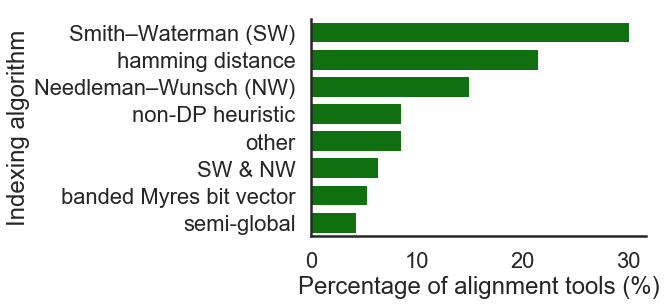

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns

clrs = ['green']

g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="counts", y="local", data=data_local,palette=clrs)
g.set(xlabel='Percentage of alignment tools (%)', ylabel='Indexing algorithm')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/global_barplot.png", bbox_inches='tight')

In [309]:
value_counts=data['Technology'].value_counts(normalize=True)
data_technology = pd.DataFrame(value_counts)
data_technology = data_technology.reset_index()
data_technology.columns = ['Technology', 'counts'] # change column names
data_technology['counts']=data_technology['counts']*100
data_technology.head()

,Technology,counts
0,DNA,72.043011
1,RNA-Seq,17.204301
2,Bisulfite,6.451613
3,DNA/RNA-Seq,2.150538
4,miRNA,1.075269


In [310]:
import matplotlib.pyplot as plt
import seaborn as sns
clrs = ['green']
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="counts", y="technology", data=data_technology,palette=clrs)
g.set(xlabel='Percentage of alignment tools (%)', ylabel='Domain')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/technology_barplot.png", bbox_inches='tight')

ValueError: Could not interpret input 'technology'

In [362]:
def f(x):
  if x['Indexing_algorithm'] == 'hashing': return 'hashing'
  elif x['Indexing_algorithm'] == 'BWT-FM': return 'FM-index'
  else: return 'other suffix tree'

data['index2'] = data.apply(f, axis=1)
data.head()

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,Number_of_citations,Indexing_algorithm,global_alignment_algorithm,wrapper,wrapper_of the original tool,...,chain_of_seeds,Technology,email - first author,email - last author,Verified,age,citation_per_year,local2,local3,index2
0,1.0,2001,SSAHA,https://www.sanger.ac.uk/science/tools/ssaha,SSAHA: a fast search method for large DNA data...,1093.0,hashing,seed,N,NaN,...,N,DNA,zn1@sanger.ac.uk,mullikin@mail.nih.gov,base-by-base alignment,19,57.526316,hamming distance,hamming_distance,hashing
1,2.0,2002,Blat,https://genome.ucsc.edu/cgi-bin/hgBlat,BLAT—the BLAST-like alignment tool,6935.0,hashing,seed,N,NaN,...,Y,DNA,kent@soe.ucsc.edu,------,"No hamming distance, it keeps increasing the s...",18,385.277778,non-DP heuristic,non_DP_heuristic,hashing
2,3.0,2003,BLASTZ,https://www.bx.psu.edu/miller_lab/,Human–Mouse Alignments with BLASTZ,1339.0,hashing,seed,Y,A wrapper of PipMaker—A Web Server for Alignin...,...,N,DNA,webb@bio.cse.psu.edu,wcm2@psu.edu,They change the alignment scoring of BlastZ in...,17,78.764706,Smith–Waterman (SW),Smith_Waterman,hashing
3,4.0,2005,C4,NaN,Automated generation of heuristics for biologi...,1138.0,hashing,seed,N,NaN,...,N,DNA,ensembl-helpdesk@ebi.ac.uk,birney@ebi.ac.uk,"If you check Fig 2, this only performs alignme...",15,75.866667,other,other,hashing
4,5.0,2005,GMAP,https://github.com/juliangehring/GMAP-GSNAP,GMAP: a genomic mapping and alignment program ...,1139.0,hashing,seed,N,NaN,...,Y,DNA,twu@gene.com,NaN,NaN,15,75.933333,Needleman–Wunsch (NW),Needleman_Wunsch,hashing


In [ ]:
value_counts=data['index2'].value_counts(normalize=True)
data_index = pd.DataFrame(value_counts)
data_index = data_index.reset_index()
data_index.columns = ['index', 'counts'] # change column names
data_index['counts']=data_index['counts']*100
data_index.head()

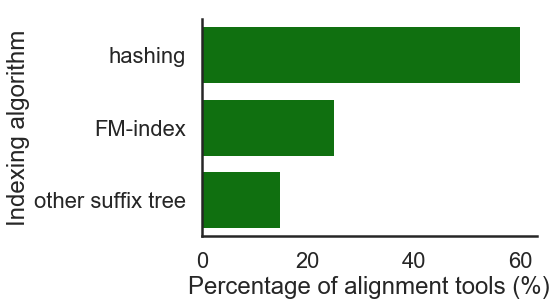

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns
clrs = ['green']
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="counts", y="index", data=data_index,palette=clrs)
g.set(xlabel='Percentage of alignment tools (%)', ylabel='Indexing algorithm')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/index_barplot.png", bbox_inches='tight')

In [312]:
value_counts=data['global_alignment_algorithm'].value_counts(normalize=True)
data_global = pd.DataFrame(value_counts)
data_global = data_global.reset_index()
data_global.columns = ['global', 'counts'] # change column names
data_global['counts']=data_global['counts']*100
data_global.head()

,global,counts
0,seed,79.569892
1,Backward Search,20.430108


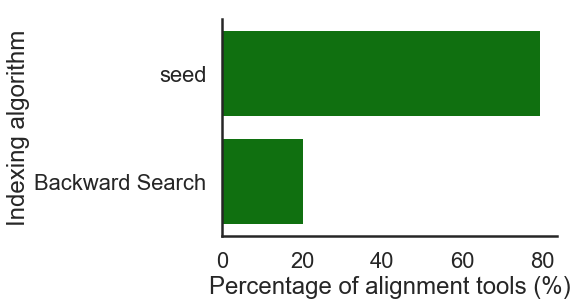

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
clrs = ['green']
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="counts", y="global", data=data_global,palette=clrs)
g.set(xlabel='Percentage of alignment tools (%)', ylabel='Indexing algorithm')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/global_barplot.pdf", bbox_inches='tight')

In [314]:
data_RNA=data.loc[data['Technology'] == 'RNA-Seq']
data_DNA=data.loc[data['Technology'] == 'DNA']
data_BS=data.loc[data['Technology'] == 'Bisulfite']

In [315]:
value_counts=data_RNA['index2'].value_counts(normalize=True)
data_index_RNA = pd.DataFrame(value_counts)
data_index_RNA = data_index_RNA.reset_index()
data_index_RNA.columns = ['index', 'counts'] # change column names
data_index_RNA.head()

KeyError: 'index2'

In [316]:
value_counts=data_DNA['index2'].value_counts(normalize=True)
data_index_DNA = pd.DataFrame(value_counts)
data_index_DNA = data_index_DNA.reset_index()
data_index_DNA.columns = ['index', 'counts'] # change column names
data_index_DNA.head()

KeyError: 'index2'

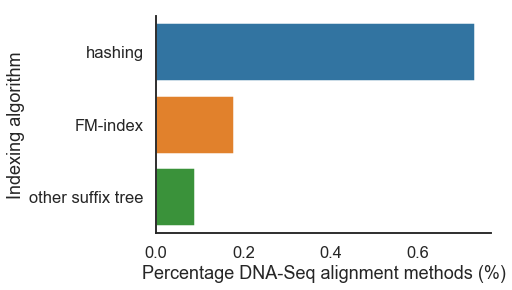

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="index", data=data_index_DNA)
g.set(xlabel='Percentage DNA-Seq alignment methods (%)', ylabel='Indexing algorithm')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/index_barplot_DNASeq.png", bbox_inches='tight')

In [318]:
value_counts=data_BS['index2'].value_counts(normalize=True)
data_index_BS = pd.DataFrame(value_counts)
data_index_BS = data_index_BS.reset_index()
data_index_BS.columns = ['index', 'counts'] # change column names
data_index_BS.head()

KeyError: 'index2'

In [319]:
value_counts=data['wrapper'].value_counts(normalize=True)
data_wrapper = pd.DataFrame(value_counts)
data_wrapper = data_wrapper.reset_index()
data_wrapper.columns = ['index', 'counts'] # change column names
data_wrapper.head()

,index,counts
0,N,0.83871
1,Y,0.16129


In [320]:
value_counts=data_RNA['wrapper'].value_counts(normalize=True)
data_wrapper_RNA = pd.DataFrame(value_counts)
data_wrapper_RNA = data_wrapper_RNA.reset_index()
data_wrapper_RNA.columns = ['wrapper', 'counts'] # change column names
data_wrapper_RNA.head()

,wrapper,counts
0,Y,0.5
1,N,0.5


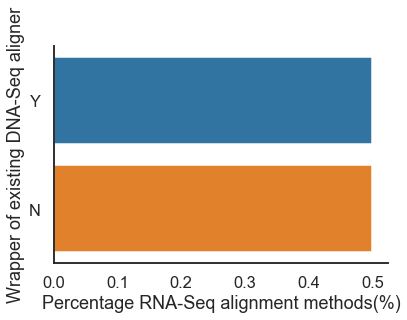

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="wrapper", data=data_wrapper_RNA)
g.set(xlabel='Percentage RNA-Seq alignment methods(%)', ylabel='Wrapper of existing DNA-Seq aligner')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/wrapper_barplot_RNASeq.png", bbox_inches='tight')

In [322]:
value_counts=data_BS['wrapper'].value_counts(normalize=True)
data_wrapper_BS = pd.DataFrame(value_counts)
data_wrapper_BS = data_wrapper_BS.reset_index()
data_wrapper_BS.columns = ['wrapper', 'counts'] # change column names
data_wrapper_BS.head()

,wrapper,counts
0,Y,0.5
1,N,0.5


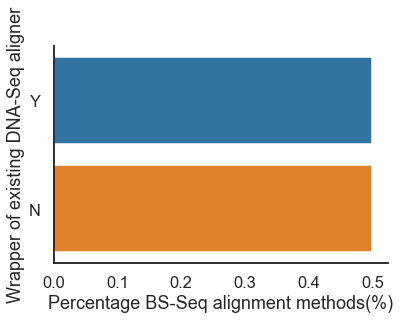

In [323]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="wrapper", data=data_wrapper_BS)
g.set(xlabel='Percentage BS-Seq alignment methods(%)', ylabel='Wrapper of existing DNA-Seq aligner')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/wrapper_barplot_BSSeq.png", bbox_inches='tight')

In [324]:
data_RNA_notWrapper=data_RNA.loc[data_RNA['wrapper'] != 'Y']
data_RNA_notWrapper

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,Number_of_citations,Indexing_algorithm,global_alignment_algorithm,wrapper,wrapper_of the original tool,...,hybrid seeding (search for keyword variable),spaced seed (search for spaced or gapped),chain_of_seeds,Technology,email - first author,email - last author,Verified,age,citation_per_year,local2
40,41.0,2010,Supersplat,NaN,Supersplat—spliced RNA-seq alignment,58.0,hashing,seed,N,NaN,...,Y,N,N,RNA-Seq,NaN,info@mocklerlab.org,NaN,10,5.800000,other
47,47.0,2011,SOAPSplice,http://soap.genomics.org.cn/soapsplice.html,SOAPsplice: genome-wide ab initio detection of...,112.0,BWT-FM,seed,N,NaN,...,N,N,N,RNA-Seq,NaN,smyiu@cs.hku.hk,we can call the alignment method as segmentati...,9,12.444444,non-DP heuristic
56,56.0,2012,OSA,NaN,OSA: a fast and accurate alignment tool for RN...,72.0,hashing,seed,N,NaN,...,N,N,N,RNA-Seq,john.hu@omicsoft.com,NaN,NaN,8,9.000000,other
65,65.0,2013,CRAC,http://crac.gforge.inria.fr/,CRAC: an integrated approach to the analysis o...,60.0,BWT-FM,seed,N,NaN,...,N,N,N,RNA-Seq,nicolas.philippe@seqone.fr,Eric.Rivals@lirmm.fr,NaN,7,8.571429,non-DP heuristic
69,69.0,2013,STAR,https://github.com/alexdobin/STAR,STAR: ultrafast universal RNA-seq aligner,6021.0,suffix array,seed,N,NaN,...,Y,N,N,RNA-Seq,dobin@cshl.edu,gingeras@cshl.edu,NaN,7,860.142857,Smith–Waterman (SW)
70,70.0,2013,Subread,http://subread.sourceforge.net/,"The Subread aligner: fast, accurate and scalab...",775.0,hashing,seed,N,NaN,...,N,Y,N,RNA-Seq,NaN,shi@wehi.edu.au,NaN,7,110.714286,Smith–Waterman (SW)
80,80.0,2015,HISAT,http://www.ccb.jhu.edu/software/hisat/index.shtml,HISAT: a fast spliced aligner with low memory ...,1611.0,BWT-FM,Backward Search,N,NaN,...,N,N,N,RNA-Seq,Daehwan.Kim@UTSouthwestern.edu,salzberg@jhu.edu,talked about cach misses of FM-index vs Hash t...,5,322.200000,hamming distance
87,88.0,2017,DART,https://github.com/hsinnan75/DART,DART: a fast and accurate RNA-seq mapper with ...,3.0,BWT-FM,Backward Search,N,NaN,...,Y,N,N,RNA-Seq,NaN,hsu@iis.sinica.edu.tw,NaN,3,1.000000,Needleman–Wunsch (NW)


In [325]:
value_counts=data_RNA_notWrapper['index2'].value_counts(normalize=True)
data_index_RNA_notWrapper = pd.DataFrame(value_counts)
data_index_RNA_notWrapper = data_index_RNA_notWrapper.reset_index()
data_index_RNA_notWrapper.columns = ['index', 'counts'] # change column names
data_index_RNA_notWrapper.head()

KeyError: 'index2'

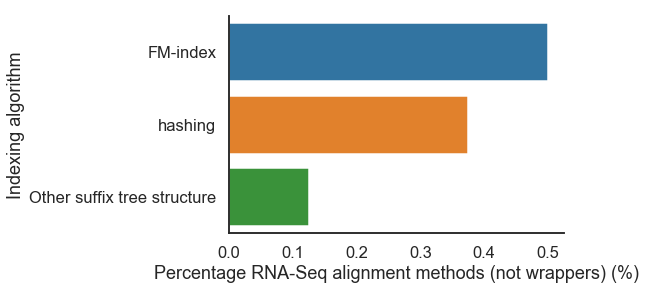

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="index", data=data_index_RNA_notWrapper)
g.set(xlabel='Percentage RNA-Seq alignment methods (not wrappers) (%)', ylabel='Indexing algorithm')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/index_barplot_RNASeq_notWraper.png", bbox_inches='tight')

In [327]:
data_BS_notWrapper=data_BS.loc[data_BS['wrapper'] != 'Y']
data_BS_notWrapper

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,Number_of_citations,Indexing_algorithm,global_alignment_algorithm,wrapper,wrapper_of the original tool,...,hybrid seeding (search for keyword variable),spaced seed (search for spaced or gapped),chain_of_seeds,Technology,email - first author,email - last author,Verified,age,citation_per_year,local2
15,16.0,2009,BRAT,http://compbio.cs.ucr.edu/brat/,BRAT: bisulfite-treated reads analysis tool,62.0,hashing,seed,N,NaN,...,N,N,N,Bisulfite,elenah@cs.ucr.edu,stefano.lonardi@ucr.edu,NaN,11,5.636364,hamming distance
16,17.0,2009,BSMAP,https://github.com/genome-vendor/bsmap,BSMAP: whole genome bisulfite sequence MAPping...,475.0,hashing,seed,N,NaN,...,N,N,N,Bisulfite,NaN,wl1@bcm.edu,NaN,11,43.181818,hamming distance
54,54.0,2012,BRAT-BW,http://compbio.cs.ucr.edu/brat/,BRAT-BW: efficient and accurate mapping of bis...,65.0,BWT-FM,Backward Search,N,NaN,...,Y,N,N,Bisulfite,elenayharris@gmail.com,stefano.lonardi@ucr.edu,NaN,8,8.125000,hamming distance


In [328]:
value_counts=data_BS_notWrapper['index2'].value_counts(normalize=True)
data_index_BS_notWrapper = pd.DataFrame(value_counts)
data_index_BS_notWrapper = data_index_BS_notWrapper.reset_index()
data_index_BS_notWrapper.columns = ['index', 'counts'] # change column names
data_index_BS_notWrapper.head()

KeyError: 'index2'

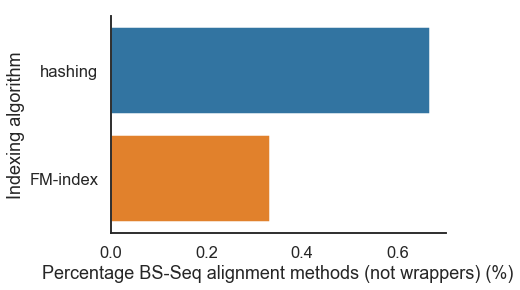

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="counts", y="index", data=data_index_BS_notWrapper)
g.set(xlabel='Percentage BS-Seq alignment methods (not wrappers) (%)', ylabel='Indexing algorithm')
g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/index_barplot_BSSeq_notWraper.png", bbox_inches='tight')

In [330]:
value_counts=data['Technology'].value_counts(normalize=True)
data_technology = pd.DataFrame(value_counts)
data_technology = data_technology.reset_index()
data_technology.columns = ['technology', 'counts'] # change column names
data_technology.head()

,technology,counts
0,DNA,0.720430
1,RNA-Seq,0.172043
2,Bisulfite,0.064516
3,DNA/RNA-Seq,0.021505
4,miRNA,0.010753


# Technology 

# Index

In [331]:
n=data.shape[0]

n_hashing=data.loc[data['Indexing_algorithm'] == 'hashing'].shape[0]
n_FM=data.loc[data['Indexing_algorithm'] == 'BWT-FM'].shape[0]
n_ST=data.loc[data['Indexing_algorithm'] != 'hashing'].shape[0]-n_FM



# Global

# Local

# Number of citations -- index

In [332]:
data.groupby(['global_alignment_algorithm'])['Number_of_citations'].sum()

global_alignment_algorithm
Backward Search    54511.0
seed               53910.0
Name: Number_of_citations, dtype: float64

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data_clean=data.loc[data['index'] != 'BWT-ST']
data_clean=data_clean.loc[data_clean['index'] != 'suffix tree']



g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="index", y="citation_per_year", data=data_clean,edgecolor=(0.2,0.2,0.2), capsize=0.3,  errwidth=1.5)

#g=sns.boxplot(x="index", y="citation_per_year", data=data)
#g=sns.swarmplot(x="index", y="citation_per_year", data=data)

g.set(xlabel='Indexing technique', ylabel='Number of citations per year')
g=sns.despine()
plt.xticks(rotation=90)
pl.savefig('Figure_1_panels/Citation.per.index.pdf', bbox_inches='tight')




p_value1 = stats.kruskal(data[(data['index']=='hashing')].index.tolist(),
                         data[(data['index']=='BWT-FM')].index.tolist())

p_value2 = stats.kruskal(data[(data['index']=='suffix array')].index.tolist(),
                         data[(data['index']=='BWT-FM')].index.tolist())

p_value3 = stats.kruskal(data[(data['index']=='suffix array')].index.tolist(),
                         data[(data['index']=='hashing')].index.tolist())

print (p_value1)
print (p_value2)
print (p_value3)

KeyError: 'index'

# Number of citations -- local

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats




g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="global", y="citation_per_year", data=data_clean,edgecolor=(0.2,0.2,0.2), capsize=0.3,  errwidth=1.5)

#g=sns.boxplot(x="index", y="citation_per_year", data=data)
#g=sns.swarmplot(x="index", y="citation_per_year", data=data)

g.set(xlabel='Indexing teachnique', ylabel='Number of citations per year')
g=sns.despine()
plt.xticks(rotation=90)
pl.savefig('Figure_1_panels/Citation.per.global.pdf', bbox_inches='tight')




p_value1 = stats.kruskal(data[(data['global']=='Backward Search')].index.tolist(),
                         data[(data['global']=='seed')].index.tolist())

p_value2 = stats.kruskal(data[(data['global']=='Backward Search')].index.tolist(),
                         data[(data['global']=='chain of seeds')].index.tolist())





NameError: name 'data_clean' is not defined

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats





g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="local", y="citation_per_year", data=data_clean,edgecolor=(0.2,0.2,0.2), capsize=0.3,  errwidth=1.5)

#g=sns.boxplot(x="index", y="citation_per_year", data=data)
#g=sns.swarmplot(x="local", y="citation_per_year", data=data)

g.set(xlabel='Indexing teachnique', ylabel='Number of citations per year')
g=sns.despine()
plt.xticks(rotation=90)
pl.savefig('Figure_1_panels/Citation.per.local.pdf', bbox_inches='tight')




p_value1 = stats.kruskal(data[(data['local']=='hamming distance')].index.tolist(),
                         data[(data['local']=='Smith-Waterman')].index.tolist())

p_value2 = stats.kruskal(data[(data['local']=='backtracking')].index.tolist(),
                         data[(data['local']=='Smith-Waterman')].index.tolist())



print (p_value1)
print (p_value2)


NameError: name 'data_clean' is not defined

# Technology 

In [336]:
data_filtered=data[(data['Technology'] !='DNA/RNA-Seq')]
data_filtered=data_filtered[(data_filtered['Technology'] !='RNA-seq')]
data_filtered=data_filtered[(data_filtered['Technology'] !='miRNA')]
data_filtered.head()

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,Number_of_citations,Indexing_algorithm,global_alignment_algorithm,wrapper,wrapper_of the original tool,...,hybrid seeding (search for keyword variable),spaced seed (search for spaced or gapped),chain_of_seeds,Technology,email - first author,email - last author,Verified,age,citation_per_year,local2
0,1.0,2001,SSAHA,https://www.sanger.ac.uk/science/tools/ssaha,SSAHA: a fast search method for large DNA data...,1093.0,hashing,seed,N,NaN,...,N,N,N,DNA,zn1@sanger.ac.uk,mullikin@mail.nih.gov,base-by-base alignment,19,57.526316,hamming distance
1,2.0,2002,Blat,https://genome.ucsc.edu/cgi-bin/hgBlat,BLAT—the BLAST-like alignment tool,6935.0,hashing,seed,N,NaN,...,N,N,Y,DNA,kent@soe.ucsc.edu,------,"No hamming distance, it keeps increasing the s...",18,385.277778,non-DP heuristic
2,3.0,2003,BLASTZ,https://www.bx.psu.edu/miller_lab/,Human–Mouse Alignments with BLASTZ,1339.0,hashing,seed,Y,A wrapper of PipMaker—A Web Server for Alignin...,...,N,N,N,DNA,webb@bio.cse.psu.edu,wcm2@psu.edu,They change the alignment scoring of BlastZ in...,17,78.764706,Smith–Waterman (SW)
3,4.0,2005,C4,NaN,Automated generation of heuristics for biologi...,1138.0,hashing,seed,N,NaN,...,N,N,N,DNA,ensembl-helpdesk@ebi.ac.uk,birney@ebi.ac.uk,"If you check Fig 2, this only performs alignme...",15,75.866667,other
4,5.0,2005,GMAP,https://github.com/juliangehring/GMAP-GSNAP,GMAP: a genomic mapping and alignment program ...,1139.0,hashing,seed,N,NaN,...,Y,N,Y,DNA,twu@gene.com,NaN,NaN,15,75.933333,Needleman–Wunsch (NW)


In [337]:
data_filtered.sort_values('citation_per_year')

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,Number_of_citations,Indexing_algorithm,global_alignment_algorithm,wrapper,wrapper_of the original tool,...,hybrid seeding (search for keyword variable),spaced seed (search for spaced or gapped),chain_of_seeds,Technology,email - first author,email - last author,Verified,age,citation_per_year,local2
44,44.0,2011,DynMap,can't be reached,DynMap: mapping short reads to multiple relate...,2.0,hashing,seed,N,NaN,...,N,N,N,DNA,Tomas.Flouri@fit.cvut.cz,solon.pissis@kcl.ac.uk,This tool handles the alignment for updated po...,9,0.222222,non-DP heuristic
90,91.0,2018,lordFAST,https://github.com/vpc-ccg/lordfast,lordFAST: sensitive and Fast Alignment Search ...,2.0,hashing,seed,N,NaN,...,N,N,N,DNA,ehaghshe@sfu.ca,faraz.hach@ubc.ca,NaN,2,1.000000,Needleman–Wunsch (NW)
87,88.0,2017,DART,https://github.com/hsinnan75/DART,DART: a fast and accurate RNA-seq mapper with ...,3.0,BWT-FM,Backward Search,N,NaN,...,Y,N,N,RNA-Seq,NaN,hsu@iis.sinica.edu.tw,NaN,3,1.000000,Needleman–Wunsch (NW)
82,82.0,2016,NanoBLASTer,https://github.com/ruhulsbu/NanoBLASTer,Fast Alignment and Characterization of Oxford ...,5.0,hashing,seed,N,NaN,...,N,N,Y,DNA,moamin@cs.stonybrook.edu,mschatz@cshl.edu,NaN,4,1.250000,Needleman–Wunsch (NW)
49,49.0,2011,X-Mate,http://grimmond.imb.uq.edu.au/X-MATE/,X-MATE: a flexible system for mapping short re...,15.0,hashing,seed,N,ISAS (http://www.imagenix.com),...,Y,N,N,DNA,NaN,NaN,"In this strategy, tags are first mapped at ful...",9,1.666667,non-DP heuristic
83,83.0,2016,ERNE,http://erne.sourceforge.net/,"Fast, accurate, and lightweight analysis of BS...",7.0,hashing,seed,N,NaN,...,N,N,N,DNA,nicola.prezza@gmail.com,NaN,NaN,4,1.750000,hamming distance
68,68.0,2013,SRmapper,http://www.umsl.edu/~wongch/software.html,SRmapper: a fast and sensitive genome-hashing ...,18.0,hashing,seed,N,NaN,...,N,N,N,DNA,NaN,wongch@msx.umsl.edu,NaN,7,2.571429,hamming distance
76,76.0,2014,JAGuaR,NaN,JAGuaR: Junction Alignments to Genome for RNA-...,17.0,BWT-FM,Backward Search,Y,BWA (wrapper),...,N,N,N,RNA-Seq,yaron.butterfield@gmail.com,ibirol@bcgsc.ca,NaN,6,2.833333,Smith–Waterman (SW)
84,84.0,2016,rHAT,https://github.com/dfguan/rHAT,rHAT: fast alignment of noisy long reads with ...,13.0,hashing,seed,N,NaN,...,N,N,N,DNA,NaN,NaN,NaN,4,3.250000,Smith–Waterman (SW)
75,75.0,2014,hpg-Aligner,https://github.com/opencb/hpg-aligner,Acceleration of short and long DNA read mappin...,20.0,suffix array,seed,N,NaN,...,Y,N,N,DNA,jtarraga@cipf.es,NaN,NaN,6,3.333333,Smith–Waterman (SW)


KruskalResult(statistic=3.6280650319829135, pvalue=0.05681283322703938)


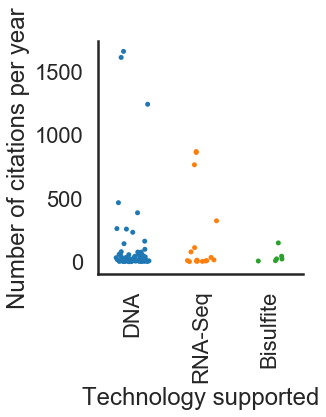

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


g=sns.set_style("white")
g=sns.set_context("poster")
#g=sns.barplot(x="technology", y="citation_per_year", data=data,edgecolor=(0.2,0.2,0.2), capsize=0.3,  errwidth=1.5)

g=sns.catplot(x='Technology', y='citation_per_year', data=data_filtered,jitter='0.25')


g.set(xlabel='Technology supported', ylabel='Number of citations per year')
g=sns.despine()
plt.xticks(rotation=90)
pl.savefig('Figure_1_panels/Citation.per.domain.pdf', bbox_inches='tight')

p_value = stats.kruskal(data[(data.Technology=='DNA')].index.tolist(),
                         data[(data.Technology=='RNA-Seq')].index.tolist())
print (p_value)

In [339]:
data_sum=pd.pivot_table(data, index=['Technology'],values=['citation_per_year'],aggfunc = {'citation_per_year':np.sum})
data_sum=data_sum.rename(index=str, columns={"citation_per_year": "sum_citations"})
data_sum.head()

,sum_citations
Technology,
Bisulfite,248.386039
DNA,7780.278576
DNA/RNA-Seq,78.000000
RNA-Seq,3097.408405
RNA-seq,0.000000


In [340]:
data_technology.head()

,technology,counts
0,DNA,0.720430
1,RNA-Seq,0.172043
2,Bisulfite,0.064516
3,DNA/RNA-Seq,0.021505
4,miRNA,0.010753


In [341]:
data_citations=pd.merge(data_sum,data_technology,on='Technology')
data_citations.head()

KeyError: 'Technology'

/Users/serghei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/serghei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


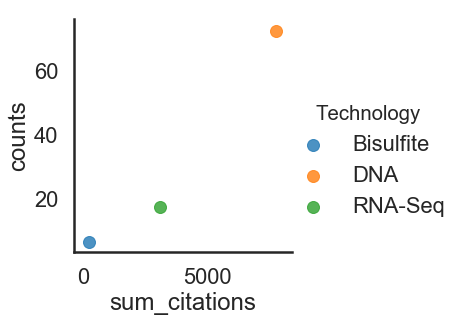

In [342]:
data_citations_filtered=data_citations[(data_citations['Technology'] !='DNA/RNA-Seq')]
data_citations_filtered=data_citations_filtered[(data_citations['Technology'] !='RNA-seq')]
data_citations_filtered=data_citations_filtered[(data_citations['Technology'] !='miRNA')]


g=sns.lmplot(data=data_citations_filtered, x='sum_citations', y='counts', hue='Technology',fit_reg=False)





In [343]:
data.groupby('index2').citation_per_year.sum().plot(kind='bar')

KeyError: 'index2'

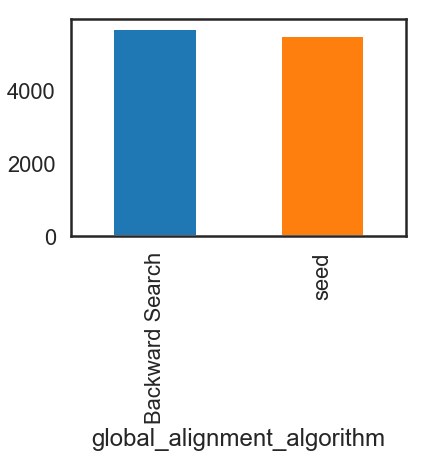

In [344]:
data.groupby('global_alignment_algorithm').citation_per_year.sum().plot(kind='bar')

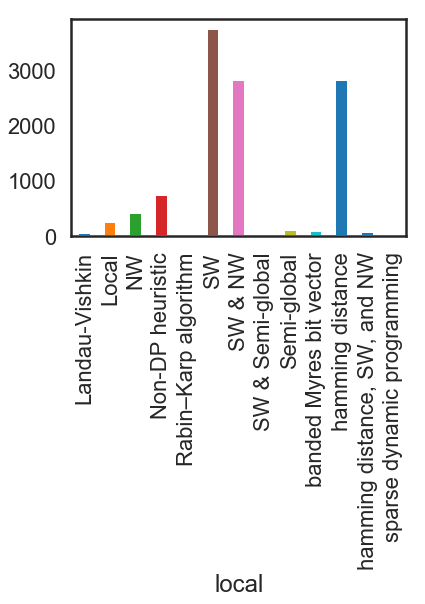

In [345]:
data.groupby('local').citation_per_year.sum().plot(kind='bar')

# Technology by year

In [346]:
n_tools_DNA=[]
n_tools_RNA=[]
n_tools_BS=[]



for i in range(2001,2019):
    df_temp=data[(data.Year_of_publication == i)]
    n_tools_DNA.append(df_temp[(df_temp.Technology == 'DNA')].shape[0])
    n_tools_RNA.append(df_temp[(df_temp.Technology == 'RNA-Seq')].shape[0])
    n_tools_BS.append(df_temp[(df_temp.Technology == 'Bisulfite')].shape[0])
    
    

from numpy import cumsum, ones


n_tools_DNA_cumsum=cumsum(n_tools_DNA)
n_tools_RNA_cumsum=cumsum(n_tools_RNA)
n_tools_BS_cumsum=cumsum(n_tools_BS)

print (n_tools_DNA_cumsum)
print (n_tools_RNA_cumsum)
print (n_tools_BS_cumsum)


[ 1  2  3  3  5  5  5 12 27 34 40 49 53 59 60 65 65 67]
[ 0  0  0  0  0  0  0  1  2  5  6  8 12 13 15 15 16 16]
[0 0 0 0 0 0 0 0 2 3 4 5 6 6 6 6 6 6]


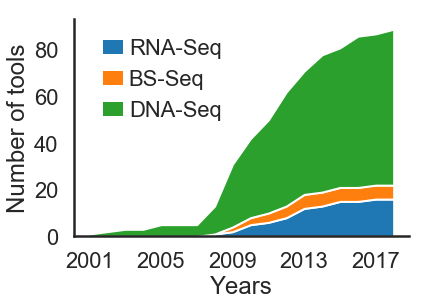

In [347]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
g=sns.set_style("white")
g=sns.set_context("poster")    
    
# Data
x=range(2001,2019)
y=[n_tools_RNA_cumsum, n_tools_BS_cumsum,n_tools_DNA_cumsum ]
 
plt.xticks(np.arange(2001, 2019, step=4))
plt.yticks(np.arange(0, 110, step=20))   

    
# Plot
plt.stackplot(x,y, labels=['RNA-Seq','BS-Seq','DNA-Seq',])
plt.legend(loc='upper left')

plt.legend(bbox_to_anchor=(0.5,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1)
plt.xlabel('Years')
plt.ylabel('Number of tools')

g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/Number.tools.per.domain.pdf", bbox_inches='tight')

# Index by year

In [348]:
tools_hashing=[]
tools_FM=[]
tools_suffix=[]



for i in range(2001,2019):
    df_temp=data[(data.Year_of_publication == i)]
    
    
    n_hash=df_temp.loc[df_temp['index2'] == 'hashing'].shape[0]
    n_FM=df_temp.loc[df_temp['index2'] == 'FM-index'].shape[0]
    n_suffix=df_temp.loc[df_temp['index2'] == 'other suffix tree'].shape[0]
    
    tools_hashing.append(n_hash)
    tools_FM.append(n_FM)
    tools_suffix.append(n_suffix)
    
    

from numpy import cumsum, ones


tools_hashing_cumsum=cumsum(tools_hashing)
tools_FM_cumsum=cumsum(tools_FM)
tools_suffix_cumsum=cumsum(tools_suffix)

print (tools_hashing_cumsum)
print (tools_FM_cumsum)
print (tools_suffix_cumsum)

KeyError: 'index2'

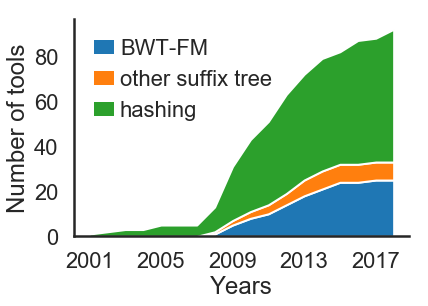

In [349]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
g=sns.set_style("white")
g=sns.set_context("poster")    
    
# Data
x=range(2001,2019)
y=[tools_FM_cumsum, tools_suffix_cumsum,tools_hashing_cumsum ]
 
plt.xticks(np.arange(2001, 2019, step=4))
plt.yticks(np.arange(0, 110, step=20))   

    
# Plot
plt.stackplot(x,y, labels=['BWT-FM','other suffix tree','hashing'])
plt.legend(loc='upper left')

plt.legend(bbox_to_anchor=(0.65,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1)
plt.xlabel('Years')
plt.ylabel('Number of tools')


g=sns.despine()
#plt.show(g)


plt.savefig("Figure_1_panels/Number.tools.per.index.pdf",bbox_inches="tight")

In [350]:
tools_seed=[]
tools_BS=[]



for i in range(2001,2019):
    df_temp=data[(data.Year_of_publication == i)]
    
    
    n_seed=df_temp.loc[df_temp['global_alignment_algorithm'] == 'seed'].shape[0]
    n_BS=df_temp.loc[df_temp['global_alignment_algorithm'] == 'Backward Search'].shape[0]
    
    tools_seed.append(n_seed)
    tools_BS.append(n_BS)
    
    

from numpy import cumsum, ones


tools_seed_cumsum=cumsum(tools_seed)
tools_BS_cumsum=cumsum(tools_BS)

print (tools_seed_cumsum)
print (tools_BS_cumsum)

[ 1  2  3  3  5  5  5 12 27 36 43 52 59 64 64 69 69 73]
[ 0  0  0  0  0  0  0  1  4  7  8 11 13 15 18 18 19 19]


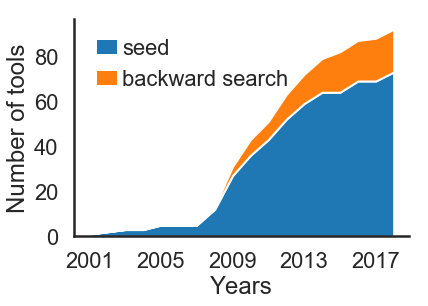

In [351]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
g=sns.set_style("white")
g=sns.set_context("poster")    
    
# Data
x=range(2001,2019)
y=[tools_seed_cumsum, tools_BS_cumsum ]
 
plt.xticks(np.arange(2001, 2019, step=4))
plt.yticks(np.arange(0, 110, step=20))   

    
# Plot
plt.stackplot(x,y, labels=['seed','backward search'])
plt.legend(loc='upper left')

plt.legend(bbox_to_anchor=(0.7,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1)

g=sns.despine()
plt.xlabel('Years')
plt.ylabel('Number of tools')

plt.savefig("Figure_1_panels/Number.tools.per.global.pdf",bbox_inches="tight")

In [352]:
def f(x):
    if x['local'] == 'SW': return 'Smith_Waterman' 
    elif x['local'] == 'hamming distance': return 'hamming_distance'
    elif x['local'] == 'NW': return 'Needleman_Wunsch'
    elif x['local'] == 'Non-DP heuristic': return 'non_DP_heuristic'
    elif x['local'] == 'SW & NW': return 'SW_NW'
    elif x['local'] == 'banded Myres bit vector': return 'banded_bit_vector'
    elif x['local'] == 'Semi-global': return 'semi_global'
    elif x['local'] == 'Local': return 'Smith_Waterman'
    else: return 'other'

data['local3'] = data.apply(f, axis=1)
data.head()

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,Number_of_citations,Indexing_algorithm,global_alignment_algorithm,wrapper,wrapper_of the original tool,...,spaced seed (search for spaced or gapped),chain_of_seeds,Technology,email - first author,email - last author,Verified,age,citation_per_year,local2,local3
0,1.0,2001,SSAHA,https://www.sanger.ac.uk/science/tools/ssaha,SSAHA: a fast search method for large DNA data...,1093.0,hashing,seed,N,NaN,...,N,N,DNA,zn1@sanger.ac.uk,mullikin@mail.nih.gov,base-by-base alignment,19,57.526316,hamming distance,hamming_distance
1,2.0,2002,Blat,https://genome.ucsc.edu/cgi-bin/hgBlat,BLAT—the BLAST-like alignment tool,6935.0,hashing,seed,N,NaN,...,N,Y,DNA,kent@soe.ucsc.edu,------,"No hamming distance, it keeps increasing the s...",18,385.277778,non-DP heuristic,non_DP_heuristic
2,3.0,2003,BLASTZ,https://www.bx.psu.edu/miller_lab/,Human–Mouse Alignments with BLASTZ,1339.0,hashing,seed,Y,A wrapper of PipMaker—A Web Server for Alignin...,...,N,N,DNA,webb@bio.cse.psu.edu,wcm2@psu.edu,They change the alignment scoring of BlastZ in...,17,78.764706,Smith–Waterman (SW),Smith_Waterman
3,4.0,2005,C4,NaN,Automated generation of heuristics for biologi...,1138.0,hashing,seed,N,NaN,...,N,N,DNA,ensembl-helpdesk@ebi.ac.uk,birney@ebi.ac.uk,"If you check Fig 2, this only performs alignme...",15,75.866667,other,other
4,5.0,2005,GMAP,https://github.com/juliangehring/GMAP-GSNAP,GMAP: a genomic mapping and alignment program ...,1139.0,hashing,seed,N,NaN,...,N,Y,DNA,twu@gene.com,NaN,NaN,15,75.933333,Needleman–Wunsch (NW),Needleman_Wunsch


In [353]:
tools_Smith_Waterman=[]
tools_hamming_distance=[]
tools_other=[]
tools_Needleman_Wunsch=[]
tools_non_DP_heuristic=[]
tools_SW_NW=[]
tools_banded_bit_vector=[]
tools_semi_global=[]






for i in range(2001,2019):
    df_temp=data[(data.Year_of_publication == i)]
    
    
    n_Smith_Waterman=df_temp.loc[df_temp['local3'] == 'Smith_Waterman'].shape[0]
    n_hamming_distance=df_temp.loc[df_temp['local3'] == 'hamming_distance'].shape[0]
    n_Needleman_Wunsch=df_temp.loc[df_temp['local3'] == 'Needleman_Wunsch'].shape[0]
    n_non_DP_heuristic=df_temp.loc[df_temp['local3'] == 'non_DP_heuristic'].shape[0]
    n_SW_NW=df_temp.loc[df_temp['local3'] == 'SW_NW'].shape[0]
    n_banded_bit_vector=df_temp.loc[df_temp['local3'] == 'banded_bit_vector'].shape[0]
    n_other=df_temp.loc[df_temp['local3'] == 'other'].shape[0]
    n_semi_global=df_temp.loc[df_temp['local3'] == 'semi_global'].shape[0]

    

        
    tools_Smith_Waterman.append(n_Smith_Waterman)
    tools_hamming_distance.append(n_hamming_distance)
    tools_Needleman_Wunsch.append(n_Needleman_Wunsch)
    tools_non_DP_heuristic.append(n_non_DP_heuristic)
    tools_SW_NW.append(n_SW_NW)
    tools_banded_bit_vector.append(n_banded_bit_vector)
    tools_other.append(n_other)
    tools_semi_global.append(n_semi_global)
    
    

from numpy import cumsum, ones




tools_Smith_Waterman_cumsum=cumsum(tools_Smith_Waterman)
tools_hamming_distance_cumsum=cumsum(tools_hamming_distance)
tools_Needleman_Wunsch_cumsum=cumsum(tools_Needleman_Wunsch)
tools_non_DP_heuristic_cumsum=cumsum(tools_non_DP_heuristic)
tools_SW_NW_cumsum=cumsum(tools_SW_NW)
tools_banded_bit_vector_cumsum=cumsum(tools_banded_bit_vector)
tools_other_cumsum=cumsum(tools_other)
tools_semi_global_cumsum=cumsum(tools_semi_global)



print (tools_Smith_Waterman_cumsum)
print (tools_hamming_distance_cumsum)
print (tools_Needleman_Wunsch_cumsum)
print (tools_non_DP_heuristic_cumsum)
print (tools_SW_NW_cumsum)
print (tools_banded_bit_vector_cumsum)
print (tools_other_cumsum)
print (tools_semi_global_cumsum)






[ 0  0  1  1  1  1  1  5 11 14 16 18 20 24 24 25 25 27]
[ 1  1  1  1  1  1  1  2  7 12 13 15 16 17 19 20 20 20]
[ 0  0  0  0  1  1  1  1  4  4  6  9  9  9  9 11 12 14]
[0 1 1 1 1 1 1 3 3 4 7 7 8 8 8 8 8 8]
[0 0 0 0 0 0 0 0 0 0 0 1 5 5 6 6 6 6]
[0 0 0 0 0 0 0 0 1 1 1 4 5 5 5 5 5 5]
[0 0 0 0 1 1 1 2 4 6 6 7 7 8 8 8 8 8]
[0 0 0 0 0 0 0 0 1 2 2 2 2 3 3 4 4 4]


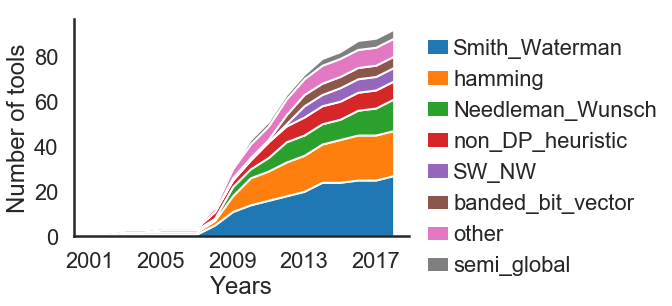

In [354]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
g=sns.set_style("white")
g=sns.set_context("poster")    
    
# Data
x=range(2001,2019)
y=[tools_Smith_Waterman_cumsum, tools_hamming_distance_cumsum,tools_Needleman_Wunsch_cumsum,
   tools_non_DP_heuristic_cumsum,tools_SW_NW_cumsum,tools_banded_bit_vector_cumsum,tools_other_cumsum,tools_semi_global_cumsum]
 
    
    

    
plt.xticks(np.arange(2001, 2019, step=4))
plt.yticks(np.arange(0, 110, step=20))   

    
# Plot
plt.stackplot(x,y, labels=['Smith_Waterman','hamming','Needleman_Wunsch','non_DP_heuristic','SW_NW',
                          'banded_bit_vector','other','semi_global'])
plt.legend(loc='upper left')

plt.legend(bbox_to_anchor=(1.8,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1)

g=sns.despine()
plt.xlabel('Years')
plt.ylabel('Number of tools')


plt.savefig("Figure_1_panels/Number.tools.per.local.pdf",bbox_inches="tight")

In [355]:
import pandas as pd
from pysankey import sankey

pd.options.display.max_rows = 8
df = pd.read_csv(
    'pysankey/fruits.txt', sep=' ', names=['true', 'predicted']
)
colorDict = {
    'apple':'#f71b1b',
    'blueberry':'#1b7ef7',
    'banana':'#f3f71b',
    'lime':'#12e23f',
    'orange':'#f78c1b'
}
sankey(
    df['true'], df['predicted'], aspect=20, colorDict=colorDict,
    fontsize=12, figureName="fruit"
)
# Result is in "fruit.png"

ModuleNotFoundError: No module named 'pysankey'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
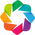

In [356]:
# adopted from here: http://holoviews.org/reference/elements/bokeh/Sankey.html
import holoviews as hv
from holoviews import opts, dim
hv.extension('bokeh')

In [370]:
#index2 global_alignment_algorithm local3
df_Sankey = data[['index2','global_alignment_algorithm','local3']]
df_Sankey['index-global'] = df_Sankey[['index2', 'global_alignment_algorithm']].apply(lambda x: '--'.join(x), axis=1)
df_Sankey['global-local'] = df_Sankey[['global_alignment_algorithm', 'local3']].apply(lambda x: '--'.join(x), axis=1)
df_Sankey.head()

/Users/serghei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/serghei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,index2,global_alignment_algorithm,local3,index-global,global-local
0,hashing,seed,hamming_distance,hashing--seed,seed--hamming_distance
1,hashing,seed,non_DP_heuristic,hashing--seed,seed--non_DP_heuristic
2,hashing,seed,Smith_Waterman,hashing--seed,seed--Smith_Waterman
3,hashing,seed,other,hashing--seed,seed--other
4,hashing,seed,Needleman_Wunsch,hashing--seed,seed--Needleman_Wunsch


In [377]:
from itertools import product
from collections import Counter
Counter(df_Sankey['index-global'].tolist())

Counter({'hashing--seed': 60,
         'FM-index--Backward Search': 17,
         'other suffix tree--seed': 6,
         'other suffix tree--Backward Search': 2,
         'FM-index--seed': 8})

In [378]:
Counter(df_Sankey['global-local'].tolist())

Counter({'seed--hamming_distance': 13,
         'seed--non_DP_heuristic': 8,
         'seed--Smith_Waterman': 22,
         'seed--other': 8,
         'seed--Needleman_Wunsch': 13,
         'Backward Search--Smith_Waterman': 6,
         'Backward Search--hamming_distance': 7,
         'seed--semi_global': 4,
         'seed--banded_bit_vector': 3,
         'Backward Search--SW_NW': 3,
         'Backward Search--banded_bit_vector': 2,
         'seed--SW_NW': 3,
         'Backward Search--Needleman_Wunsch': 1})

In [389]:
nodes = ["Hashing", "FM-index",  "Other suffix tree", #012
          "Seed","Backward Search",#34
          "Hamming distance", #5
           "non DP_heuristic",#6
            "Other",#7
         "NW",#8
         "SW", #9
         "Semi-global",  #10
         "Banded bit vector", #11
         "SW & NW" #12
         
        ]
nodes = hv.Dataset(enumerate(nodes), 'index', 'label')
edges = [
    (0, 3, 60), (1, 4, 17), (2, 3, 6), (2, 4, 6), (1, 3, 4),(3,5,13),(3,6,8),(3,7,8),(3,8,13),(4,8,6),(4,5,7),(3,10,4),
    (3,11,3),(4,12,3),(4,11,2),(3,12,3),(4,8,1)
    
]

value_dim = hv.Dimension('Percentage', unit='%')
careers = hv.Sankey((edges, nodes), ['From', 'To'], vdims=value_dim)

careers.opts(
    opts.Sankey(labels='label', label_position='right', width=1000, height=300, cmap='Set1',
                edge_color=dim('To').str(), node_color=dim('index').str()))



careers.opts(fontsize={'title': 16, 'labels': 20, 'xticks': 6, 'yticks': 12})

:Sankey   [From,To]   (Percentage)